Central Difference Scheme
=============

# Theory
Anther variant scheme of the finite difference and more improved version of forward/backward difference schemes is the **Central Difference Approximation (CD)**. 

## Definition
The scheme is derived from linear combinations of the two finite difference schemes, namely forward and backward difference schemes. 
<!-- This is achieved by exploiting a mathematical tool which is taylor expansion as framework to derive confidences of the **CD Approximation**. -->
$$ \begin{equation}
f'(x)\approx \frac{f(x+h) - f(x-h)}{2h} \end{equation}
$$
<img src="./Resources/CD Approx.png" width="1000">

The **CD approximation** is a **Three Points Stencil** arrangement, where it is constructed by the forward node and its backward node to approximate the current node derivative.

## Examples
Let $f(x) = 3\sin(x)$ find the finite difference approximation of the first derivative at $x=2$ and compare it with the analytical solution. Consider $h=0.1$

$$
\begin{align*}
\textbf{CD:}& \qquad \nabla_h^{(1)} = \frac{3\sin(2+0.1) - 3\sin(2-0.1)}{2\cdot 0.1} = -1.246360\dots\\[10pt]
\textbf{Analytical:}& \qquad f'(x) = 3\cos(2) = -1.248440\dots
\end{align*}
$$

# Implementation

## Imports

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [2]:
domain = [-2,2]
h = 1
func = sp.sin(x)        # use sp. methods only "i.e sp.cos()"

## Algorithm

```mermaid
    flowchart LR
        get_args(Get arguments) --> f_prime(Compute equ.1 on the specified x)
```

In [3]:
def CD(f: Callable, x: float, h: float) -> float:
    '''x
    Central finite difference approximation of the derivative for a given function `f`

    Args:
        f: Function to approximate the derivative
        x: Point to evaluate the derivative at
        h: Discretization factor or step size

    Returns:
        Derivative approximation at the given point `x`
    '''
    
    return (f(x+h) - f(x-h)) / (2*h)

## Results Visualization & Basic Error Analysis
This investigation aims to illustrate accuracy of the finite difference central scheme approximation of the derivative. Common error metrics/visualization used are
- Derivative Plot: The closeness of the FD derivative approximation to the analytical
- Error Scatter: Investigation of error trends and magnitude
- $L_2$ Norm: Quantitative measure of total error
- Mean Squared Error (MSE): Quantitative measure of total error
- Maximum Absolute Error: Quantitative measure on the maximum error

In [4]:
# domain
xx = np.linspace(*domain)
xx_h = np.linspace(*domain, int((domain[1] - domain[0]) / h + 1))

# analytical derivative
func_prime = sp.diff(func)

# parse expressions to lambda
f = (lambda x : np.ones_like(x)*float(func)) if sp.simplify(func).is_constant() else sp.lambdify(x, func) 
f_prime = (lambda x : np.ones_like(x)*float(func_prime)) if sp.simplify(func_prime).is_constant() else sp.lambdify(x, func_prime)

# finite-difference approximation
f_prime_FD = [CD(f, x, h) for x in xx_h]

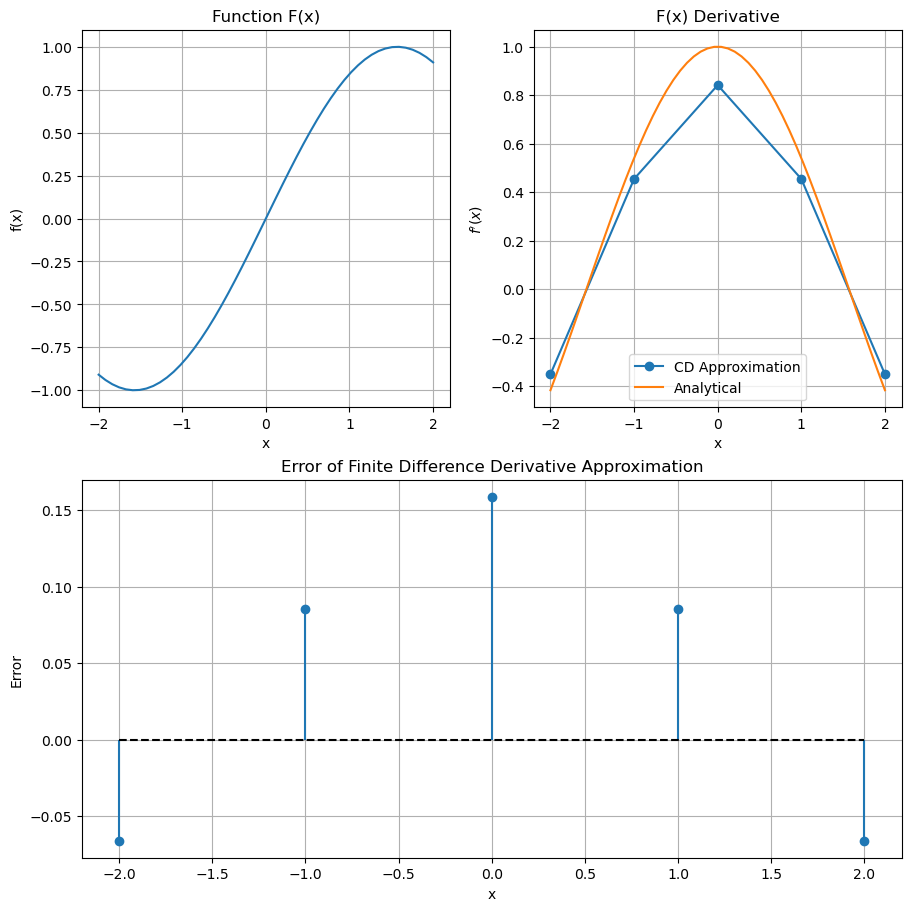

,Property,Quantity
0,l_2 error norm,0.220248
1,mean squared error,0.009702
2,maximum error,0.158529


In [5]:
fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'lower left']],
                              figsize=(9,9), layout="constrained")

# f(x) plot
ax['upper left'].plot(xx, f(xx))
ax['upper left'].set(xlabel="x", ylabel="f(x)", title="Function F(x)")
ax['upper left'].grid(True)

# derivative of f(x) plot
ax['right'].plot(xx_h, f_prime_FD, marker="o", label="CD Approximation")
ax['right'].plot(xx, f_prime(xx), label="Analytical")
ax['right'].set(xlabel="x", ylabel=r"$f'(x)$", title="F(x) Derivative")
ax['right'].legend()
ax['right'].grid(True)

# error
error = f_prime(xx_h) - f_prime_FD
ax['lower left'].stem(xx_h, error, basefmt="k--")
ax['lower left'].set(xlabel="x", ylabel="Error", title="Error of Finite Difference Derivative Approximation")
ax['lower left'].grid(True)

# summary
summary = [
    ("l_2 error norm", np.linalg.norm((error))),
    ("mean squared error", np.mean(abs(error)**2)),
    ("maximum error", np.max(abs(error)))
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df

## Convergence Analysis
In this section we will investigate the order of convergence of the scheme. This property tells us at which rate "aka order" the truncation error in the scheme change as we change the spacing parameter $h$ "i.e. the asymptotic change of the truncation error", particularly as  $h \rightarrow 0$. We will investigate this analytically and experimentally.
- Analytically: This through the definition finite difference that's derived from taylor expansion
- Experimentally: Convergence plot where we trace the error as $h$ changes

### Analytically
One can get central difference scheme by linear combination of the taylor expansion of $f(x)$ around a shifted location $x = x + h$ and $x = x-h$ where $h \gt 0$
$$
\begin{align*}
x+h:& \qquad f(x + h) = \textcolor{red}{f(x)} + \frac{h}{1!}f^\prime(x) + \textcolor{red}{\frac{h^2}{2!}f^{\prime\prime}(x)} + \frac{h^3}{3!}f^{(3)}(x) + \dots + \frac{h^n}{n!}f^{(n)}(x)\\[10pt]
x-h:& \qquad f(x - h) = \textcolor{red}{f(x)} - \frac{h}{1!}f^\prime(x) + \textcolor{red}{\frac{h^2}{2!}f^{\prime\prime}(x)} - \frac{h^3}{3!}f^{(3)}(x) + \dots - \frac{h^n}{n!}f^{(n)}(x)
\end{align*}
$$

By subtracting both equations, one can see that the derivative term $f^{\prime}(x)$ will survive "thats what we need". Rearranging the terms and multiply both side by $1/2h$, one can see that the central difference approximation *"one the left hand side"*,  with the truncation error presented in the terms right to $f^\prime(x)$ that we did not include in our approximation "i.e. we truncate the series before these terms"
$$
\begin{equation*}
\Longrightarrow \frac{f(x + h) - f(x - h)}{2h} = f^\prime(x) \;\; \underbrace{+ \frac{h^2}{3!\cdot 2}f^{(3)}(x) + \dots + \frac{h^n}{n!}f^{(n)}(x)}_{O(h^2)}
\end{equation*}
$$
We can see from the right hand side that central difference is an approximation with error of order $O(h^2)$ "i.e. second-order accurate". This means that as $h$ get smaller the error will reduce along a second order trend line.

> **Truncation Error** results from the truncating/excluding terms from infante series

### Experimentally
This achieved by tracing the error of the approximation for different ranges of $h$ and then plot them against each other. To study the asymptotic change we also plot the relation in log plo
>**Note:** Why log plot? we want to overlook any variation of the error plot that might appear in the normal scale, since this will allow us to better spot its overall trend "i.e. $O(h), \; O(h^2) \;\dots$"

In [6]:
H = np.geomspace(0.0001, 1, num=20) 

errors=[]
for h_i in H:
    error = f_prime(2) - CD(f, 2, h_i)
    errors.append(abs(error))

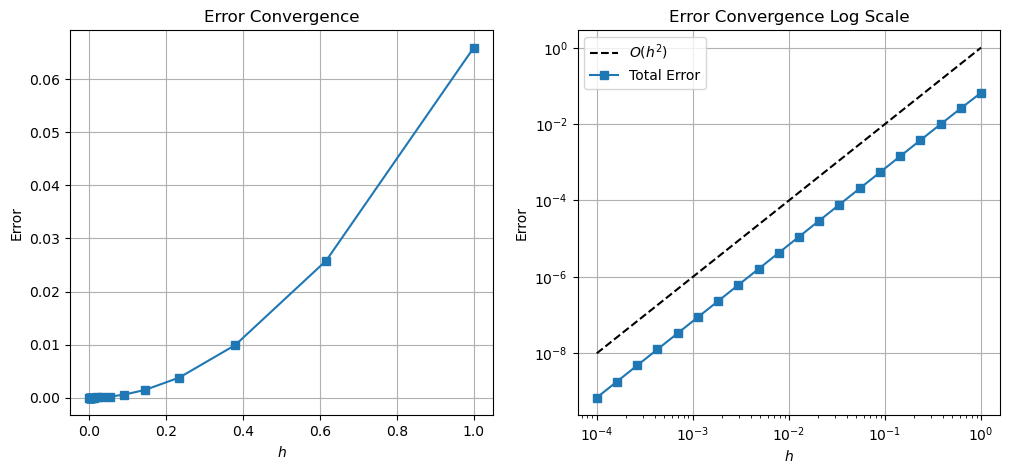

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# convergence
ax[0].plot(H, errors, marker="s", label="Total Error")
ax[0].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence")
ax[0].grid(True)

# convergence log scale
ax[1].plot(H, H**2, "k--", label=r"$O(h^2)$")                 # trend line O(h^2)
ax[1].plot(H, errors, marker="s", label="Total Error")
ax[1].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence Log Scale", xscale="log", yscale="log")
ax[1].grid(True)
ax[1].legend()

plt.show()